In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
tf.reset_default_graph()
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Actions: Buy & Sell  
Utility for each day determined by Open & Close.

### Loading Data and getting utility values

In [2]:
def find_utils(row):
    if row['Adj Close'] - row['Open'] < 0: return -1
    else: return 1

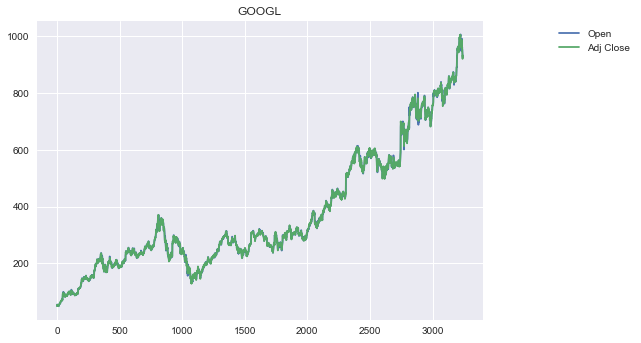

,Date,Open,High,Low,Close,Adj Close,Volume,Utility
0,2004-08-19,50.050049,52.082081,48.028027,100.339996,50.220219,44659000,1
1,2004-08-20,50.555557,54.594593,50.300301,108.310005,54.209209,22834300,1
2,2004-08-23,55.430431,56.796795,54.579578,109.400002,54.754753,18256100,-1
3,2004-08-24,55.675674,55.855854,51.836838,104.870003,52.487488,15247300,-1
4,2004-08-25,52.532532,54.054054,51.991993,106.000008,53.053055,9188600,1


In [3]:
df = pd.read_csv('data/GOOGL.csv')
df['Utility'] = df.apply(find_utils, axis=1)

data = df.drop(['Utility', 'Date'], 1).values
target = df['Utility'].values

a = plt.plot(df['Open'])
b = plt.plot(df['Adj Close'])
plt.title('GOOGL')
plt.legend((a[0], b[0]), ('Open', 'Adj Close'), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()
plt.close()
df.head()

### Formatting Data for LSTM Network

In [5]:
features=[]
for i in data:
    temp_list = []
    for j in i:
        temp_list.append([j])
    features.append(np.array(temp_list))

labels = []
for i in target:
    if i == -1: labels.append([1, -1])
    else: labels.append([-1, 1])

### LSTM 
To keep the notebook short lstm network is implemented in ./lstm.py

In [5]:
from lstm import LSTM

/Users/jarvis/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Epoch: 100%|██████████| 35000/35000 [1:59:55<00:00,  4.88it/s]  


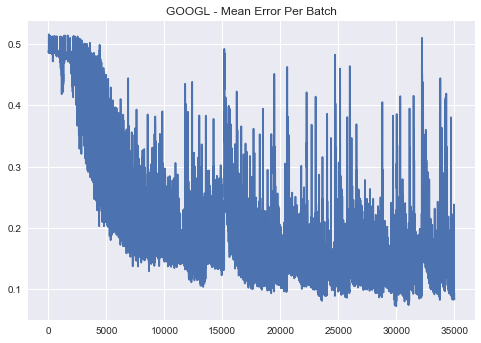

Error on Testing Datset: 0.189


In [7]:
epoch = 35000
num_cells=100

features_test = features[3000:]
labels_test = features[3000:]
features = features[:3000]
labels = labels[:3000]
len(features_test)

model = LSTM(num_hidden=num_cells)
predictions, train_error, test_error = model.run(features, labels, epoch=epoch, test_features=features_test,
                                                test_labels=labels_test)
plt.title('GOOGL - Mean Error Per Batch')
plt.plot(train_error)
plt.show()
plt.close()
print('Error on Testing Datset:', test_error)
model.reset()


### Berkshire Hathaway

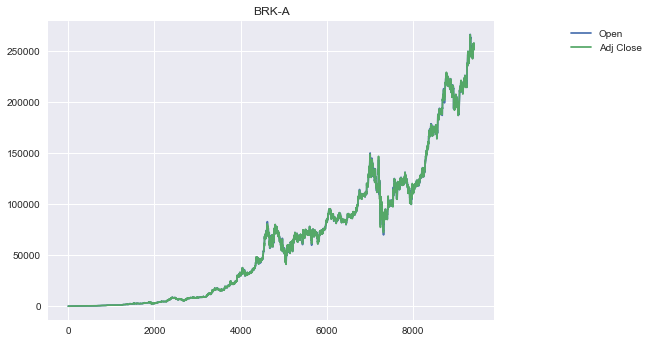

,Date,Open,High,Low,Close,Adj Close,Volume,Utility
0,1980-03-17,290.0,310.0,290.0,290.0,290.0,10000,1
1,1980-03-18,290.0,290.0,290.0,290.0,290.0,0,1
2,1980-03-19,290.0,310.0,290.0,290.0,290.0,20000,1
3,1980-03-20,290.0,290.0,290.0,290.0,290.0,0,1
4,1980-03-21,290.0,290.0,290.0,290.0,290.0,0,1


In [6]:
df = pd.read_csv('data/BRK-A.csv')
df['Utility'] = df.apply(find_utils, axis=1)

data = df.drop(['Utility', 'Date'], 1).values
target = df['Utility'].values

a = plt.plot(df['Open'])
b = plt.plot(df['Adj Close'])
plt.title('BRK-A')
plt.legend((a[0], b[0]), ('Open', 'Adj Close'), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()
plt.close()

features=[]
for i in data:
    temp_list = []
    for j in i:
        temp_list.append([j])
    features.append(np.array(temp_list))

labels = []
for i in target:
    if i == -1: labels.append([1, 0])
    else: labels.append([0, 1])

df.head()

/Users/jarvis/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Epoch: 100%|██████████| 35000/35000 [5:45:22<00:00,  1.71it/s]  


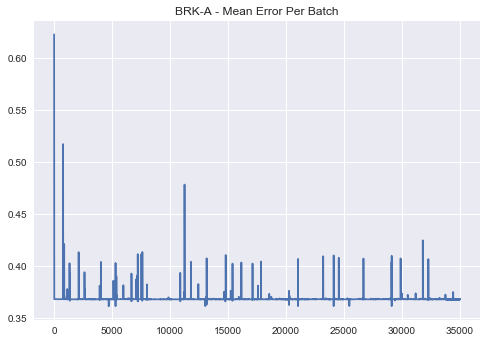

Error on Testing Datset: 0.526


In [7]:
epoch = 35000
num_cells=100

features_test = features[8500:]
labels_test = features[8500:]
features = features[:8500]
labels = labels[:8500]
len(features_test)

model = LSTM(num_hidden=num_cells)
predictions, train_error, test_error = model.run(features, labels, epoch=epoch, test_features=features_test,
                                                test_labels=labels_test)
plt.title('BRK-A - Mean Error Per Batch')
plt.plot(train_error)
plt.show()
plt.close()
print('Error on Testing Datset:', test_error)
model.reset()

### Johnson and Johnson

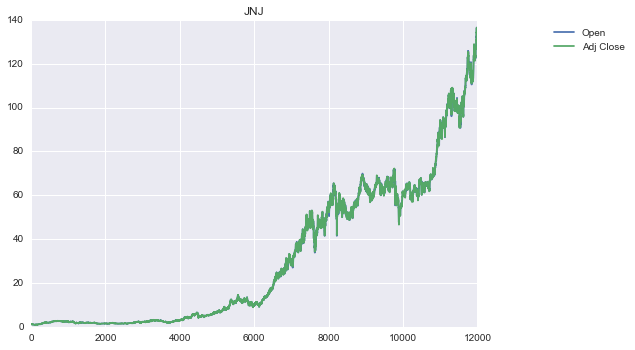

,Date,Open,High,Low,Close,Adj Close,Volume,Utility
0,1970-01-02,1.250000,1.253472,1.218750,0.453297,1.218750,1195200,-1
1,1970-01-05,1.218750,1.222222,1.187500,0.442320,1.189236,964800,-1
2,1970-01-06,1.189236,1.211806,1.184028,0.450714,1.211806,1036800,1
3,1970-01-07,1.211806,1.215278,1.203125,0.448777,1.206597,331200,-1
4,1970-01-08,1.206597,1.225694,1.206597,0.452006,1.215278,460800,1


In [3]:
df = pd.read_csv('data/JNJ.csv')
df['Utility'] = df.apply(find_utils, axis=1)

data = df.drop(['Utility', 'Date'], 1).values
target = df['Utility'].values

a = plt.plot(df['Open'])
b = plt.plot(df['Adj Close'])
plt.title('JNJ')
plt.legend((a[0], b[0]), ('Open', 'Adj Close'), loc=1, bbox_to_anchor=(1.35, 1))
plt.show()
plt.close()

features=[]
for i in data:
    temp_list = []
    for j in i:
        temp_list.append([j])
    features.append(np.array(temp_list))

labels = []
for i in target:
    if i == -1: labels.append([1, 0])
    else: labels.append([0, 1])

df.head()

/Users/jarvis/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Epoch: 100%|██████████| 35000/35000 [3:35:40<00:00,  2.95it/s]  


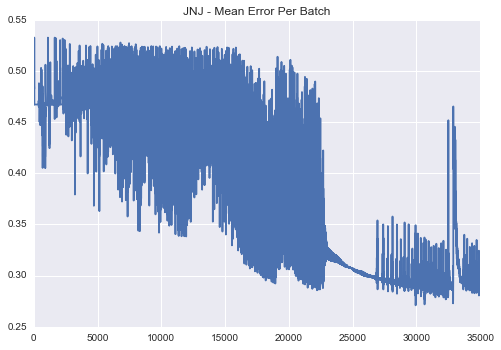

Error on Testing Datset: 0.509


In [16]:
epoch = 35000
num_cells=25

features_test = features[10000:]
labels_test = features[10000:]
features = features[:10000]
labels = labels[:10000]
len(features_test)

model = LSTM(num_hidden=num_cells)
predictions, train_error, test_error = model.run(features, labels, epoch=epoch, test_features=features_test,
                                                test_labels=labels_test)
plt.title('JNJ - Mean Error Per Batch')
plt.plot(train_error)
plt.show()
plt.close()
print('Error on Testing Datset:', test_error)

In [8]:
model.reset()

#### Increase number of cells to see if that yeilds better results

/Users/jarvis/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Epoch: 100%|██████████| 40000/40000 [7:09:09<00:00,  1.89it/s]  


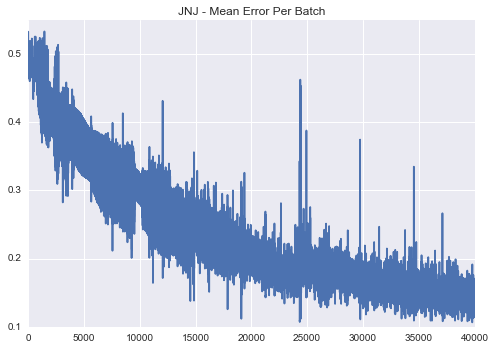

Error on Testing Datset: 0.186


In [9]:
epoch = 40000
num_cells=50

model = LSTM(num_hidden=num_cells)
predictions, train_error, test_error = model.run(features, labels, epoch=epoch, test_features=features_test,
                                                test_labels=labels_test)
plt.title('JNJ - Mean Error Per Batch')
plt.plot(train_error)
plt.show()
plt.close()
print('Error on Testing Datset:', test_error)